In [104]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

# Ejercicio 2

## 1

In [23]:
def foo(n, i, res, out=None, count=None):    
    if out is None:
        out = []
    if count is None:
        count = [0] * n
        
    out.append(i)
    count[i-1] += 1
    
    if all([x==2 for x in count]):
        res.append(out.copy())
    
    for j in range(1, n+1):
        if count[j-1] < 2:
            foo(n, j, res, out=out.copy(), count=count.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [24]:
handler(2)

[[1, 1, 2, 2],
 [1, 2, 1, 2],
 [1, 2, 2, 1],
 [2, 1, 1, 2],
 [2, 1, 2, 1],
 [2, 2, 1, 1]]

## 2

In [25]:
def foo(n, i, res, out=None, count=None):
    if out is None:
        out = []
    if count is None:
        count = [0] * n
        
    out.append(i)
    count[i-1] += 1
    
    if all([j+1 == x for j, x in enumerate(count)]):
        res.append(out.copy())
        
    for j in range(1, n+1):
        if count[j-1] < j:
            foo(n, j, res, out=out.copy(), count=count.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [26]:
handler(2)

[[1, 2, 2], [2, 1, 2], [2, 2, 1]]

## 3

In [27]:
def foo(n, i, res, out=None, count=None):    
    if out is None:
        out = []
    if count is None:
        count = [0] * n
        
    out.append(i)
    count[i-1] += 1
    
    if all([x<=2 for x in count]):
        res.append(out.copy())
    
    for j in range(1, n+1):
        if count[j-1] < 2:
            foo(n, j, res, out=out.copy(), count=count.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [28]:
handler(2)

[[1],
 [1, 1],
 [1, 1, 2],
 [1, 1, 2, 2],
 [1, 2],
 [1, 2, 1],
 [1, 2, 1, 2],
 [1, 2, 2],
 [1, 2, 2, 1],
 [2],
 [2, 1],
 [2, 1, 1],
 [2, 1, 1, 2],
 [2, 1, 2],
 [2, 1, 2, 1],
 [2, 2],
 [2, 2, 1],
 [2, 2, 1, 1]]

# Ejercicio 3

In [29]:
def is_valid(out, used):
    if not all(used):
        return False
    for i in range(2, len(out)):
        if out[i-2] < out[i-1] < out[i]:
            return False
    return True

def foo(n, i, res, out=None, used=None):
    assert n >= 3
    
    if out is None:
        out = []
    if used is None:
        used = [False] * n
    
    out.append(i)
    used[i-1] = True
    
    if is_valid(out, used):
        res.append(out.copy())
        
    for j in range(1, n+1):
        if not used[j-1]:
            foo(n, j, res, out=out.copy(), used=used.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [30]:
counts = []
for i in range(3, 11):
    x = handler(i)
    counts.append(len(x))

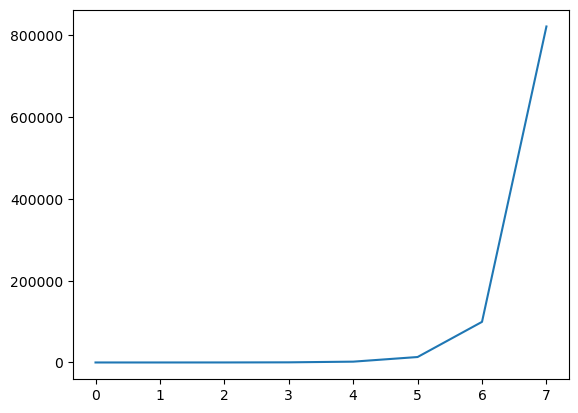

In [31]:
plt.plot(counts)

# Ejercicio 7

In [2]:
L = [0, 0, 1]

def trib(n):
    global L
    
    if len(L) <= n:
        diff = n - len(L) + 1
        for _ in range(diff):
            L.append(None)
            
    if L[n] is not None:
        return L[n]
    else:
        L[n] = trib(n-1) + trib(n-2) + trib(n-3)
        return L[n]

In [3]:
i = 0
while True:
    out = trib(i)
    if len(str(out)) == 100:
        break
    i += 1
out

1083489678390594838169695727189761003770564005347041320036550659232340355828621635463701423131151044

In [4]:
i = 0
flag = False
while True:
    if flag:
        break
    out = trib(i)
    
    count = [0] * 10
    for c in str(out):
        c = int(c)
        count[c] += 1
        if count[c] == 10:
            flag = True
    i += 1
out

12789542315272557225226295567482485993